# Task
Прочитайте файлы "heart_test.csv" и "heart_train.csv" из папки и проведите исследование и предобработку данных, обучите модель, подготовьте предсказания в формате csv с колонками "id" и "prediction", подготовьте скрипты и библиотеку для обработки данных и предсказания, напишите инструмент для тестирования и оформите документацию.

## Загрузка данных



In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
import pandas as pd
import os

# Define the base path to the data files
base_path = '/content/drive/MyDrive/ML Sprint/Masterskaya'

# Create directories for train and test data if they don't exist
train_dir = 'train'
test_dir = 'test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the paths to the data files
train_file_path = os.path.join(base_path, 'heart_train.csv')
test_file_path = os.path.join(base_path, 'heart_test.csv')

# Load the datasets into pandas DataFrames
try:
    train_df = pd.read_csv(train_file_path)
    test_df = pd.read_csv(test_file_path)
    print("Данные успешно загружены.")
except FileNotFoundError:
    print("Убедитесь, что файлы 'heart_train.csv' и 'heart_test.csv' находятся по указанному пути.")
except Exception as e:
    print(f"Произошла ошибка при загрузке данных: {e}")

# Display the first few rows of each DataFrame
if 'train_df' in locals():
    print("\nПервые строки обучающего набора данных:")
    display(train_df.head())

if 'test_df' in locals():
    print("\nПервые строки тестового набора данных:")
    display(test_df.head())

Данные успешно загружены.

Первые строки обучающего набора данных:


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,...,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,...,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,...,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,...,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,...,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047



Первые строки тестового набора данных:


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,...,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,...,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,...,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,...,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,...,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825


In [148]:
# Handle categorical features - One-Hot Encoding for 'Gender'
train_df = pd.get_dummies(train_df, columns=['Gender'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Gender'], drop_first=True)

print("Обучающий набор данных после One-Hot Encoding и обработки пропусков:")
display(train_df.head())

print("\nТестовый набор данных после One-Hot Encoding и обработки пропусков:")
display(test_df.head())


Обучающий набор данных после One-Hot Encoding и обработки пропусков:


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Systolic blood pressure,Diastolic blood pressure,id,Gender_1.0,Gender_Female,Gender_Male
0,0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,...,0.0,0.227018,0.048229,0.036512,0.212903,0.709302,2664,False,False,True
1,1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,...,0.0,0.150198,0.017616,0.000194,0.412903,0.569767,9287,False,True,False
2,2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,...,0.0,0.227018,0.048229,0.036512,0.238710,0.220930,5379,False,True,False
3,3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,...,1.0,0.227018,0.048229,0.036512,0.348387,0.267442,8222,False,True,False
4,4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,...,1.0,0.227018,0.048229,0.036512,0.619355,0.441860,4047,False,False,True



Тестовый набор данных после One-Hot Encoding и обработки пропусков:


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Systolic blood pressure,Diastolic blood pressure,id,Gender_1.0,Gender_Female,Gender_Male
0,0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,...,0.333333,0.227018,0.048229,0.036512,0.283871,0.372093,7746,False,False,True
1,1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,...,0.166667,0.227018,0.048229,0.036512,0.703226,0.441860,4202,False,True,False
2,2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,...,1.000000,0.102767,0.002666,0.088455,0.458065,0.779070,6632,False,False,True
3,3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,...,0.666667,0.203557,0.056390,0.271774,0.741935,0.255814,4639,False,True,False
4,4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,...,0.000000,0.227018,0.048229,0.036512,0.412903,0.395349,4825,False,False,True


In [149]:
columns_to_keep = [
    'id', # Keep id initially to set as index
    'Age',
    'Gender_Female',
    'Gender_Male',# Keep Gender before encoding
    'Family History',
    'Smoking',
    'BMI',
    'Alcohol Consumption',
    'Physical Activity Days Per Week',
    'Cholesterol',
    'Blood sugar',
    'Diabetes',
    'Systolic blood pressure',
    'Diastolic blood pressure',
    'Heart rate',
    'Troponin',
    'CK-MB',
    'Heart Attack Risk (Binary)' # Keep the target variable in train_df
]

train_cols_to_keep = [col for col in columns_to_keep if col in train_df.columns]
train_df = train_df[train_cols_to_keep]

test_cols_to_keep = [col for col in columns_to_keep if col in test_df.columns and col != 'Heart Attack Risk (Binary)']
test_df = test_df[test_cols_to_keep]

train_df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)


print("Обучающий набор данных после отбора столбцов и установки 'id' в качестве индекса:")
display(train_df.head())

print("\nТестовый набор данных после отбора столбцов и установки 'id' в качестве индекса:")
display(test_df.head())

Обучающий набор данных после отбора столбцов и установки 'id' в качестве индекса:


,Age,Gender_Female,Gender_Male,Family History,Smoking,BMI,Alcohol Consumption,Physical Activity Days Per Week,Cholesterol,Blood sugar,Diabetes,Systolic blood pressure,Diastolic blood pressure,Heart rate,Troponin,CK-MB,Heart Attack Risk (Binary)
id,,,,,,,,,,,,,,,,,
2664,0.359551,False,True,1.0,1.0,0.459176,1.0,3.0,0.732143,0.227018,1.0,0.212903,0.709302,0.074244,0.036512,0.048229,0.0
9287,0.202247,True,False,1.0,0.0,0.117053,1.0,3.0,0.325000,0.150198,1.0,0.412903,0.569767,0.047663,0.000194,0.017616,0.0
5379,0.606742,True,False,0.0,1.0,0.373574,1.0,2.0,0.860714,0.227018,1.0,0.238710,0.220930,0.055912,0.036512,0.048229,0.0
8222,0.730337,True,False,0.0,1.0,0.049735,1.0,0.0,0.007143,0.227018,0.0,0.348387,0.267442,0.053162,0.036512,0.048229,1.0
4047,0.775281,False,True,0.0,1.0,0.830405,1.0,5.0,0.757143,0.227018,0.0,0.619355,0.441860,0.021998,0.036512,0.048229,1.0



Тестовый набор данных после отбора столбцов и установки 'id' в качестве индекса:


,Age,Gender_Female,Gender_Male,Family History,Smoking,BMI,Alcohol Consumption,Physical Activity Days Per Week,Cholesterol,Blood sugar,Diabetes,Systolic blood pressure,Diastolic blood pressure,Heart rate,Troponin,CK-MB
id,,,,,,,,,,,,,,,,
7746,0.494382,False,True,1.0,1.0,0.283490,1.0,1.0,0.264286,0.227018,0.0,0.283871,0.372093,0.062328,0.036512,0.048229
4202,0.224719,True,False,0.0,0.0,0.467036,0.0,0.0,0.953571,0.227018,1.0,0.703226,0.441860,0.082493,0.036512,0.048229
6632,0.629213,False,True,1.0,1.0,0.409366,0.0,7.0,0.092857,0.102767,0.0,0.458065,0.779070,0.064161,0.088455,0.002666
4639,0.460674,True,False,1.0,1.0,0.910261,1.0,0.0,0.567857,0.203557,1.0,0.741935,0.255814,0.055912,0.271774,0.056390
4825,0.719101,False,True,0.0,1.0,0.758924,1.0,5.0,0.485714,0.227018,1.0,0.412903,0.395349,0.022915,0.036512,0.048229


In [150]:
print("\nПроверка пропущенных значений в обучающем наборе данных:")
print(train_df.isnull().sum())

print("\nПроверка пропущенных значений в тестовом наборе данных:")
print(test_df.isnull().sum())


Проверка пропущенных значений в обучающем наборе данных:
Age                                  0
Gender_Female                        0
Gender_Male                          0
Family History                     243
Smoking                            243
BMI                                  0
Alcohol Consumption                243
Physical Activity Days Per Week    243
Cholesterol                          0
Blood sugar                          0
Diabetes                           243
Systolic blood pressure              0
Diastolic blood pressure             0
Heart rate                           0
Troponin                             0
CK-MB                                0
Heart Attack Risk (Binary)           0
dtype: int64

Проверка пропущенных значений в тестовом наборе данных:
Age                                 0
Gender_Female                       0
Gender_Male                         0
Family History                     31
Smoking                            31
BMI                

In [151]:
# Fill missing values with -1
train_df.fillna(-1, inplace=True)
test_df.fillna(-1, inplace=True)

print("Пропущенные значения в обучающем наборе данных после заполнения:")
print(train_df.isnull().sum())

print("\nПропущенные значения в тестовом наборе данных после заполнения:")
print(test_df.isnull().sum())

print("\nПервые строки обучающего набора данных после заполнения пропусков:")
display(train_df.head())

print("\nПервые строки тестового набора данных после заполнения пропусков:")
display(test_df.head())

Пропущенные значения в обучающем наборе данных после заполнения:
Age                                0
Gender_Female                      0
Gender_Male                        0
Family History                     0
Smoking                            0
BMI                                0
Alcohol Consumption                0
Physical Activity Days Per Week    0
Cholesterol                        0
Blood sugar                        0
Diabetes                           0
Systolic blood pressure            0
Diastolic blood pressure           0
Heart rate                         0
Troponin                           0
CK-MB                              0
Heart Attack Risk (Binary)         0
dtype: int64

Пропущенные значения в тестовом наборе данных после заполнения:
Age                                0
Gender_Female                      0
Gender_Male                        0
Family History                     0
Smoking                            0
BMI                                0
Alcoho

,Age,Gender_Female,Gender_Male,Family History,Smoking,BMI,Alcohol Consumption,Physical Activity Days Per Week,Cholesterol,Blood sugar,Diabetes,Systolic blood pressure,Diastolic blood pressure,Heart rate,Troponin,CK-MB,Heart Attack Risk (Binary)
id,,,,,,,,,,,,,,,,,
2664,0.359551,False,True,1.0,1.0,0.459176,1.0,3.0,0.732143,0.227018,1.0,0.212903,0.709302,0.074244,0.036512,0.048229,0.0
9287,0.202247,True,False,1.0,0.0,0.117053,1.0,3.0,0.325000,0.150198,1.0,0.412903,0.569767,0.047663,0.000194,0.017616,0.0
5379,0.606742,True,False,0.0,1.0,0.373574,1.0,2.0,0.860714,0.227018,1.0,0.238710,0.220930,0.055912,0.036512,0.048229,0.0
8222,0.730337,True,False,0.0,1.0,0.049735,1.0,0.0,0.007143,0.227018,0.0,0.348387,0.267442,0.053162,0.036512,0.048229,1.0
4047,0.775281,False,True,0.0,1.0,0.830405,1.0,5.0,0.757143,0.227018,0.0,0.619355,0.441860,0.021998,0.036512,0.048229,1.0



Первые строки тестового набора данных после заполнения пропусков:


,Age,Gender_Female,Gender_Male,Family History,Smoking,BMI,Alcohol Consumption,Physical Activity Days Per Week,Cholesterol,Blood sugar,Diabetes,Systolic blood pressure,Diastolic blood pressure,Heart rate,Troponin,CK-MB
id,,,,,,,,,,,,,,,,
7746,0.494382,False,True,1.0,1.0,0.283490,1.0,1.0,0.264286,0.227018,0.0,0.283871,0.372093,0.062328,0.036512,0.048229
4202,0.224719,True,False,0.0,0.0,0.467036,0.0,0.0,0.953571,0.227018,1.0,0.703226,0.441860,0.082493,0.036512,0.048229
6632,0.629213,False,True,1.0,1.0,0.409366,0.0,7.0,0.092857,0.102767,0.0,0.458065,0.779070,0.064161,0.088455,0.002666
4639,0.460674,True,False,1.0,1.0,0.910261,1.0,0.0,0.567857,0.203557,1.0,0.741935,0.255814,0.055912,0.271774,0.056390
4825,0.719101,False,True,0.0,1.0,0.758924,1.0,5.0,0.485714,0.227018,1.0,0.412903,0.395349,0.022915,0.036512,0.048229


In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, classification_report

X_train = train_df.drop('Heart Attack Risk (Binary)', axis=1)
y_train = train_df['Heart Attack Risk (Binary)']


X_test = test_df.copy()

train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

X_test = X_test[train_cols]


print("Размерность обучающих признаков:", X_train.shape)
print("Размерность целевой переменной (обучение):", y_train.shape)
print("Размерность тестовых признаков:", X_test.shape)

if list(X_train.columns) == list(X_test.columns):
    print("\nСтолбцы в обучающих и тестовых признаках совпадают.")
else:
    print("\nВНИМАНИЕ: Столбцы в обучающих и тестовых признаках НЕ совпадают.")
    print("Столбцы в X_train:", list(X_train.columns))
    print("Столбцы в X_test:", list(X_test.columns))


# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("\nМодель RandomForestClassifier успешно обучена.")

# Predict probabilities on the training data for ROC-AUC calculation
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Calculate ROC-AUC score on the training data
roc_auc = roc_auc_score(y_train, y_train_pred_proba)

print(f"\nROC-AUC на обучающем наборе данных: {roc_auc:.4f}")

# Get the predicted classes for F1-score and classification report
y_train_pred_class = model.predict(X_train)

# Calculate the F1-score on the training data
f1 = f1_score(y_train, y_train_pred_class)

print(f"F1-мера на обучающем наборе данных: {f1:.4f}")

# Display classification report for more detailed metrics
print("\nОтчет по классификации на обучающем наборе данных:")
print(classification_report(y_train, y_train_pred_class))

Размерность обучающих признаков: (8685, 16)
Размерность целевой переменной (обучение): (8685,)
Размерность тестовых признаков: (966, 16)

Столбцы в обучающих и тестовых признаках совпадают.

Модель RandomForestClassifier успешно обучена.

ROC-AUC на обучающем наборе данных: 1.0000
F1-мера на обучающем наборе данных: 1.0000

Отчет по классификации на обучающем наборе данных:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5672
         1.0       1.00      1.00      1.00      3013

    accuracy                           1.00      8685
   macro avg       1.00      1.00      1.00      8685
weighted avg       1.00      1.00      1.00      8685



## Подбор гиперпараметров для RandomForestClassifier

Выполните подбор гиперпараметров для модели RandomForestClassifier с использованием кросс-валидации.

In [155]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define a reduced parameter grid for faster execution
param_dist = {'n_estimators': randint(100, 200),
              'max_depth': randint(3, 10),
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 5)}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10, # Number of parameter settings sampled (reduce for speed)
                                   cv=5,
                                   scoring='roc_auc',
                                   random_state=42,
                                   n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train, y_train)

print("Лучшие гиперпараметры:", random_search.best_params_)
print(f"Лучшее значение ROC-AUC на кросс-валидации: {random_search.best_score_:.4f}")

# Train the model with the best parameters
best_rf_model = random_search.best_estimator_

print("\nМодель RandomForestClassifier с лучшими гиперпараметрами успешно обучена.")

Лучшие гиперпараметры: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 64}
Лучшее значение ROC-AUC на кросс-валидации: 0.5612

Модель RandomForestClassifier с лучшими гиперпараметрами успешно обучена.


In [156]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, classification_report

# Evaluate the model with the best parameters using cross-validation
cv_scores_tuned = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='roc_auc')

print("Результаты кросс-валидации (ROC-AUC) для модели с лучшими гиперпараметрами:", cv_scores_tuned)
print(f"Среднее значение ROC-AUC при кросс-валидации для модели с лучшими гиперпараметрами: {cv_scores_tuned.mean():.4f}")
print(f"Стандартное отклонение ROC-AUC при кросс-валидации для модели с лучшими гиперпараметрами: {cv_scores_tuned.std():.4f}")

# Optionally, evaluate on the full training set with the best model
y_train_pred_proba_tuned = best_rf_model.predict_proba(X_train)[:, 1]
roc_auc_tuned = roc_auc_score(y_train, y_train_pred_proba_tuned)
print(f"\nROC-AUC на обучающем наборе данных для модели с лучшими гиперпараметрами: {roc_auc_tuned:.4f}")

y_train_pred_class_tuned = best_rf_model.predict(X_train)
f1_tuned = f1_score(y_train, y_train_pred_class_tuned)
print(f"F1-мера на обучающем наборе данных для модели с лучшими гиперпараметрами: {f1_tuned:.4f}")

print("\nОтчет по классификации на обучающем наборе данных для модели с лучшими гиперпараметрами:")
print(classification_report(y_train, y_train_pred_class_tuned))

Результаты кросс-валидации (ROC-AUC) для модели с лучшими гиперпараметрами: [0.54390944 0.56076222 0.56491499 0.57311619 0.56330195]
Среднее значение ROC-AUC при кросс-валидации для модели с лучшими гиперпараметрами: 0.5612
Стандартное отклонение ROC-AUC при кросс-валидации для модели с лучшими гиперпараметрами: 0.0096

ROC-AUC на обучающем наборе данных для модели с лучшими гиперпараметрами: 0.8483
F1-мера на обучающем наборе данных для модели с лучшими гиперпараметрами: 0.0243

Отчет по классификации на обучающем наборе данных для модели с лучшими гиперпараметрами:
              precision    recall  f1-score   support

         0.0       0.66      1.00      0.79      5672
         1.0       1.00      0.01      0.02      3013

    accuracy                           0.66      8685
   macro avg       0.83      0.51      0.41      8685
weighted avg       0.78      0.66      0.53      8685



In [157]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Check the distribution of the target variable before balancing
print("Распределение классов до балансировки:")
print(y_train.value_counts())

# Reshape X_train if it contains a single feature (SMOTE expects 2D array)
if len(X_train.shape) == 1:
    X_train_res = X_train.values.reshape(-1, 1)
else:
    X_train_res = X_train

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_res, y_train)

print("\nРаспределение классов после балансировки с помощью SMOTE:")
print(y_train_balanced.value_counts())

# Convert the balanced data back to DataFrame if X_train was originally a DataFrame
if isinstance(X_train, pd.DataFrame):
    X_train_balanced = pd.DataFrame(X_train_balanced, columns=X_train.columns)

print("\nРазмерность обучающих признаков после балансировки:", X_train_balanced.shape)
print("Размерность целевой переменной (обучение) после балансировки:", y_train_balanced.shape)

# Update X_train and y_train to the balanced dataframes for subsequent steps
X_train = X_train_balanced
y_train = y_train_balanced

print("\nОбучающие данные обновлены с учетом балансировки классов.")

Распределение классов до балансировки:
Heart Attack Risk (Binary)
0.0    5672
1.0    3013
Name: count, dtype: int64

Распределение классов после балансировки с помощью SMOTE:
Heart Attack Risk (Binary)
0.0    5672
1.0    5672
Name: count, dtype: int64

Размерность обучающих признаков после балансировки: (11344, 16)
Размерность целевой переменной (обучение) после балансировки: (11344,)

Обучающие данные обновлены с учетом балансировки классов.


In [158]:
# Train the model with the best parameters on the balanced data
best_rf_model.fit(X_train, y_train)

print("\nМодель RandomForestClassifier с лучшими гиперпараметрами успешно обучена на сбалансированных данных.")

# Evaluate the model with the best parameters on the balanced data using cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, classification_report

cv_scores_tuned_balanced = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='roc_auc')

print("\nРезультаты кросс-валидации (ROC-AUC) для модели с лучшими гиперпараметрами на сбалансированных данных:", cv_scores_tuned_balanced)
print(f"Среднее значение ROC-AUC при кросс-валидации для модели с лучшими гиперпараметрами на сбалансированных данных: {cv_scores_tuned_balanced.mean():.4f}")
print(f"Стандартное отклонение ROC-AUC при кросс-валидации для модели с лучшими гиперпараметрами на сбалансированных данных: {cv_scores_tuned_balanced.std():.4f}")

# Evaluate on the full balanced training set
y_train_pred_proba_tuned_balanced = best_rf_model.predict_proba(X_train)[:, 1]
roc_auc_tuned_balanced = roc_auc_score(y_train, y_train_pred_proba_tuned_balanced)
print(f"\nROC-AUC на сбалансированном обучающем наборе данных для модели с лучшими гиперпараметрами: {roc_auc_tuned_balanced:.4f}")

y_train_pred_class_tuned_balanced = best_rf_model.predict(X_train)
f1_tuned_balanced = f1_score(y_train, y_train_pred_class_tuned_balanced)
print(f"F1-мера на сбалансированном обучающем наборе данных для модели с лучшими гиперпараметрами: {f1_tuned_balanced:.4f}")

print("\nОтчет по классификации на сбалансированном обучающем наборе данных для модели с лучшими гиперпараметрами:")
print(classification_report(y_train, y_train_pred_class_tuned_balanced))


Модель RandomForestClassifier с лучшими гиперпараметрами успешно обучена на сбалансированных данных.

Результаты кросс-валидации (ROC-AUC) для модели с лучшими гиперпараметрами на сбалансированных данных: [0.5608555  0.5648354  0.66065932 0.82661974 0.83042577]
Среднее значение ROC-AUC при кросс-валидации для модели с лучшими гиперпараметрами на сбалансированных данных: 0.6887
Стандартное отклонение ROC-AUC при кросс-валидации для модели с лучшими гиперпараметрами на сбалансированных данных: 0.1197

ROC-AUC на сбалансированном обучающем наборе данных для модели с лучшими гиперпараметрами: 0.8112
F1-мера на сбалансированном обучающем наборе данных для модели с лучшими гиперпараметрами: 0.7330

Отчет по классификации на сбалансированном обучающем наборе данных для модели с лучшими гиперпараметрами:
              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71      5672
         1.0       0.71      0.76      0.73      5672

    accuracy               

In [159]:
# Display the best hyperparameters found by RandomizedSearchCV
print("Лучшие гиперпараметры:", random_search.best_params_)

# Display the evaluation scores for the best model on balanced data
print(f"\nСреднее значение ROC-AUC при кросс-валидации на сбалансированных данных: {cv_scores_tuned_balanced.mean():.4f}")
print(f"ROC-AUC на сбалансированном обучающем наборе данных: {roc_auc_tuned_balanced:.4f}")
print(f"F1-мера на сбалансированном обучающем наборе данных: {f1_tuned_balanced:.4f}")

Лучшие гиперпараметры: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 64}

Среднее значение ROC-AUC при кросс-валидации на сбалансированных данных: 0.6887
ROC-AUC на сбалансированном обучающем наборе данных: 0.8112
F1-мера на сбалансированном обучающем наборе данных: 0.7330


Важность признаков (отсортировано по убыванию) для лучшей модели RF на сбалансированных данных:
Troponin                           0.135912
CK-MB                              0.128980
Systolic blood pressure            0.086387
Diastolic blood pressure           0.079544
Heart rate                         0.079105
BMI                                0.078590
Cholesterol                        0.069756
Age                                0.067040
Blood sugar                        0.065280
Physical Activity Days Per Week    0.059176
Diabetes                           0.047575
Family History                     0.032575
Smoking                            0.030362
Alcohol Consumption                0.027708
Gender_Male                        0.006768
Gender_Female                      0.005243
dtype: float64


/tmp/ipython-input-3088720640.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance_series.values, y=sorted_importance_series.index, palette='viridis')


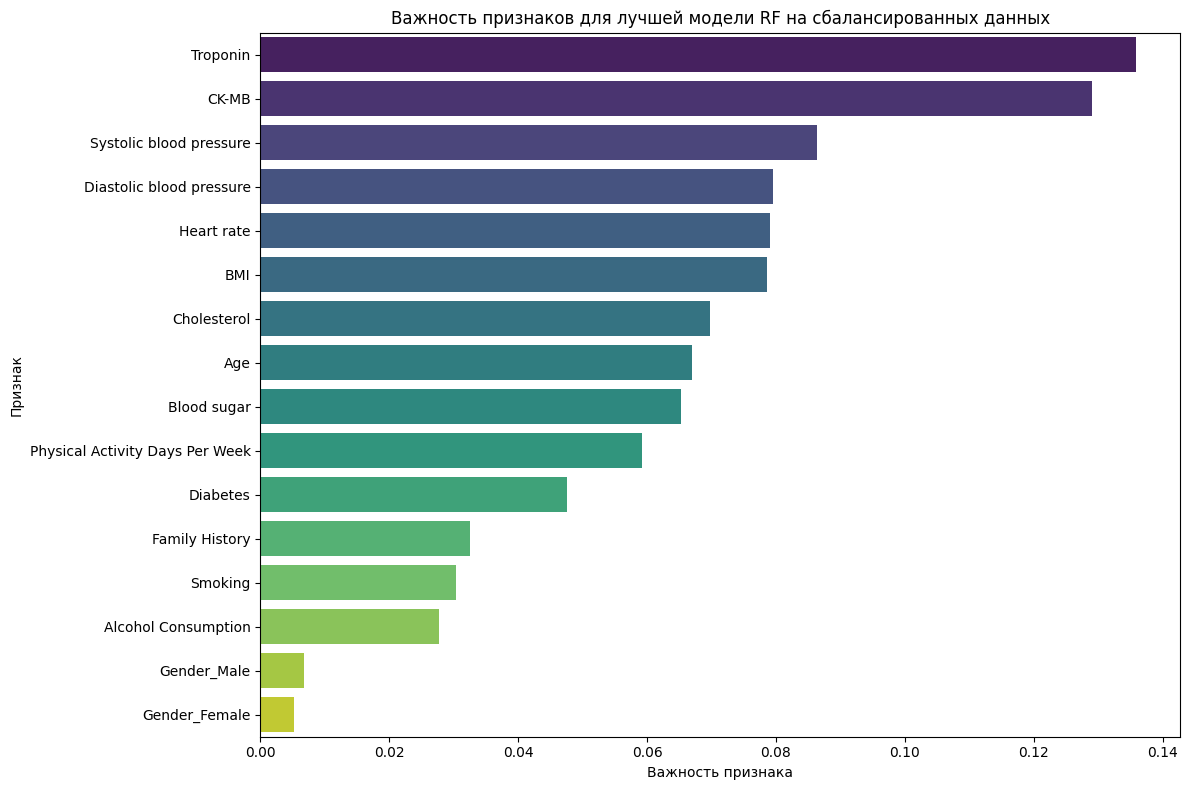

In [160]:
# Get feature importances from the trained RandomForestClassifier model (best_rf_model)
feature_importances = best_rf_model.feature_importances_

# Create a pandas Series with feature names as index and importances as values
importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance in descending order
sorted_importance_series = importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Важность признаков (отсортировано по убыванию) для лучшей модели RF на сбалансированных данных:")
print(sorted_importance_series)

# Optional: Visualize the top N most important features
top_n = len(sorted_importance_series) # Visualize all features
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importance_series.values, y=sorted_importance_series.index, palette='viridis')
plt.title(f'Важность признаков для лучшей модели RF на сбалансированных данных')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

In [134]:
X_test_final = test_df.copy()

train_cols = X_train.columns # X_train now holds the balanced data features
test_cols = X_test_final.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_final[c] = 0


X_test_final = X_test_final[train_cols]


test_predictions_proba = best_rf_model.predict_proba(X_test_final)[:, 1]

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
test_predictions_binary = (test_predictions_proba >= 0.5).astype(int)


predictions_df = pd.DataFrame({'id': X_test_final.index, 'prediction': test_predictions_binary})

# Display the first few rows of the predictions DataFrame
print("Первые строки DataFrame с бинарными предсказаниями:")
display(predictions_df.head())

# Save the predictions DataFrame to a CSV file
predictions_output_path = 'predictions.csv'
predictions_df.to_csv(predictions_output_path, index=False)

print(f"\nПредсказания сохранены в файл: {predictions_output_path}")

Первые строки DataFrame с бинарными предсказаниями:


,id,prediction
0,7746,1
1,4202,0
2,6632,1
3,4639,1
4,4825,1



Предсказания сохранены в файл: predictions.csv


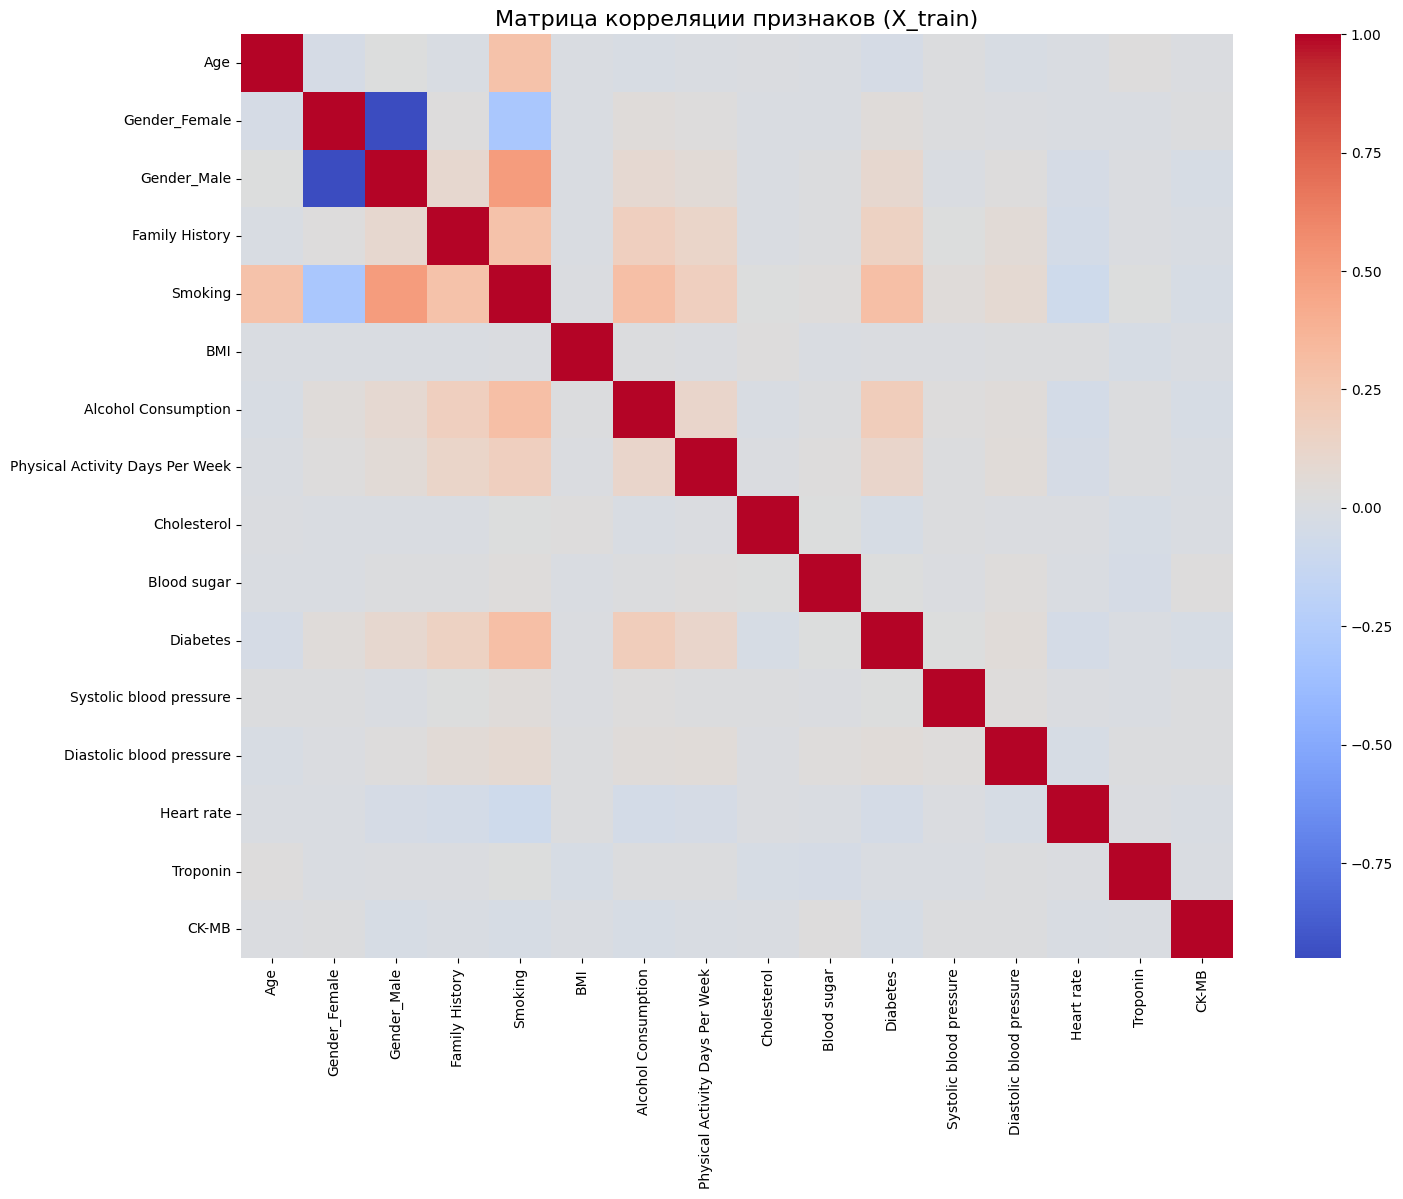

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for X_train
correlation_matrix = X_train.corr()

# Set the figure size for better readability
plt.figure(figsize=(16, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Add a title to the heatmap
plt.title('Матрица корреляции признаков (X_train)', fontsize=16)

# Display the heatmap
plt.show()